# Segunda entrega proyecto Mineria de datos

>Juan Castillo

>Daniela Herrera



# Librerias empleadas para esta entrega y carga de la base de datos

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
import altair as alt
import matplotlib.pyplot as plt
import plotly.express as px
import sklearn.metrics as metrics


np.set_printoptions(suppress=True)
#import warnings
#warnings.filterwarnings('ignore')

In [36]:
url = 'https://raw.githubusercontent.com/DavidCastillo13/MineriaDatos_2022_2/main/ObesityDataSet_raw_and_data_sinthetic.csv'
data = pd.read_csv(url)
data.head()

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        Normal_Weight  
3                Walking   Overweight_Level_I  
4  Public_Transportation  Overweight_Level_II

# Preprocesamiento de la base

In [37]:
data_m = data.copy() # Creando una copia de base original

In [38]:
data_m.isnull().sum() # No hay valores faltantes para la base 

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [39]:
data_m.describe()

Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866  
std       0.612953     0.850592     0.608927  
min       1.000000     0.000000     0.000000  
25%       1.584812     0.124505     0.000000  
50%       2.000000     1.000000     0.625350  
75%       2.477420     1.666678     1.000000  
max       3.000000     3.000000     2.000000

Se tienen valores continuos para la edad, como por ejemplo 38.112989, y como en la guia no se tiene una descripcion del por que la edad tiene esta caracteristica, se trabajara truncando a un decimal la edad de los individuos

In [40]:
data_m['Age']=data_m['Age'].round(0)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


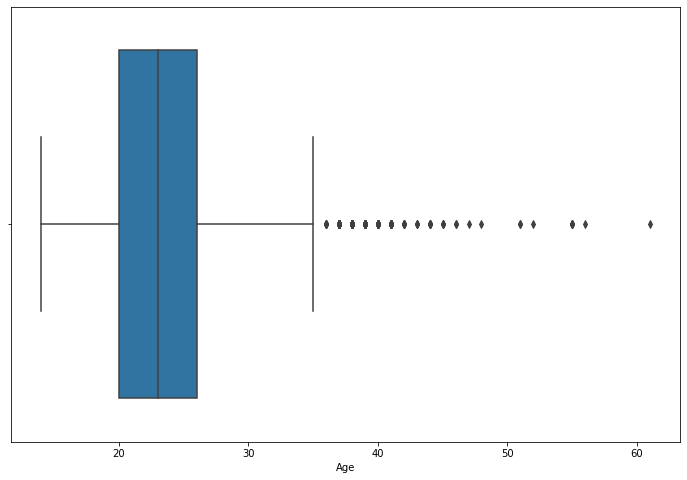

In [41]:
plt.figure(figsize=(12,8))
sns.boxplot(data_m['Age']) # Por medio del box plot se ve que para la edad hay valores "atipicos" asumiendo que sigan una distribucion normal, revisando estos valores

In [42]:
data_m[data_m['Age'] > 35]['Age'].value_counts() # 

38.0    34
39.0    25
37.0    24
41.0    20
40.0    19
44.0     6
36.0     6
42.0     6
55.0     5
43.0     3
45.0     3
51.0     2
46.0     2
56.0     1
52.0     1
61.0     1
48.0     1
47.0     1
Name: Age, dtype: int64

In [43]:
data_m[data_m['Age'] > 35]

Gender   Age    Height      Weight family_history_with_overweight FAVC  \
13      Male  41.0  1.800000   99.000000                             no  yes   
21    Female  52.0  1.690000   87.000000                            yes  yes   
33      Male  39.0  1.790000   90.000000                             no   no   
92      Male  55.0  1.780000   84.000000                            yes   no   
104   Female  38.0  1.560000   80.000000                            yes  yes   
...      ...   ...       ...         ...                            ...  ...   
1740    Male  38.0  1.763582  117.861590                            yes  yes   
1775    Male  37.0  1.762921  118.401740                            yes  yes   
1776    Male  38.0  1.752863  119.201465                            yes  yes   
1777    Male  39.0  1.768235  117.792268                            yes  yes   
1778    Male  38.0  1.766888  118.134898                            yes  yes   

          FCVC       NCP        CAEC SMOKE      CH2O  SCC       FAF      TUE  \
13    2.000000  3.000000   Sometimes    no  2.000000   no  2.000000  1.00000   
21    3.000000  1.000000   Sometimes   yes  2.000000   no  0.000000  0.00000   
33    2.000000  1.000000   Sometimes    no  2.000000   no  0.000000  0.00000   
92    3.000000  4.000000  Frequently    no  3.000000  yes  3.000000  0.00000   
104   2.000000  3.000000   Sometimes    no  2.000000   no  0.000000  0.00000   
...        ...       ...         ...   ...       ...  ...       ...      ...   
1740  2.145114  2.888193   Sometimes    no  2.038128   no  0.852344  0.00000   
1775  2.136830  2.993084   Sometimes    no  1.885926   no  0.615298  0.00000   
1776  2.499388  2.989791   Sometimes    no  1.959777   no  0.608100  0.64676   
1777  2.230742  2.920373   Sometimes    no  1.831187   no  0.756277  0.00000   
1778  2.240757  2.911568   Sometimes    no  1.895876   no  0.822186  0.00000   

            CALC                 MTRANS           NObeyesdad  
13    Frequently             Automobile       Obesity_Type_I  
21            no             Automobile       Obesity_Type_I  
33     Sometimes  Public_Transportation  Overweight_Level_II  
92    Frequently                Walking   Overweight_Level_I  
104    Sometimes             Automobile       Obesity_Type_I  
...          ...                    ...                  ...  
1740   Sometimes             Automobile      Obesity_Type_II  
1775   Sometimes             Automobile      Obesity_Type_II  
1776   Sometimes             Automobile      Obesity_Type_II  
1777   Sometimes             Automobile      Obesity_Type_II  
1778   Sometimes             Automobile      Obesity_Type_II  

[160 rows x 17 columns]

In [44]:
data_m['Gender'].value_counts() # Hay 1068 hombres y 1043 mujeres (No evidencia para errores)

Male      1068
Female    1043
Name: Gender, dtype: int64

# Consistencia

Se requiere el análisis de las variables que seran clasiicadas tales como: 


*   Gender
*   Age
*  Weight
*  Family history with overweight
*  FAVC (calorias)
*  FCVC (consumo de verduras)
* NCP (cantidad de comidas)
* CH20 (consumo de agua)
*  FAF (actividad física)



In [45]:
data_m.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

Por lo anterior se evidencian variables de tipo discretas la cuales se ajustaran a un modelo Lasso con tareas de clasificacion

# Regresión Lasso

Variable responsable 

In [46]:
trabajo=data_m.copy()
trabajo

Gender   Age    Height      Weight family_history_with_overweight FAVC  \
0     Female  21.0  1.620000   64.000000                            yes   no   
1     Female  21.0  1.520000   56.000000                            yes   no   
2       Male  23.0  1.800000   77.000000                            yes   no   
3       Male  27.0  1.800000   87.000000                             no   no   
4       Male  22.0  1.780000   89.800000                             no   no   
...      ...   ...       ...         ...                            ...  ...   
2106  Female  21.0  1.710730  131.408528                            yes  yes   
2107  Female  22.0  1.748584  133.742943                            yes  yes   
2108  Female  23.0  1.752206  133.689352                            yes  yes   
2109  Female  24.0  1.739450  133.346641                            yes  yes   
2110  Female  24.0  1.738836  133.472641                            yes  yes   

      FCVC  NCP       CAEC SMOKE      CH2O  SCC       FAF       TUE  \
0      2.0  3.0  Sometimes    no  2.000000   no  0.000000  1.000000   
1      3.0  3.0  Sometimes   yes  3.000000  yes  3.000000  0.000000   
2      2.0  3.0  Sometimes    no  2.000000   no  2.000000  1.000000   
3      3.0  3.0  Sometimes    no  2.000000   no  2.000000  0.000000   
4      2.0  1.0  Sometimes    no  2.000000   no  0.000000  0.000000   
...    ...  ...        ...   ...       ...  ...       ...       ...   
2106   3.0  3.0  Sometimes    no  1.728139   no  1.676269  0.906247   
2107   3.0  3.0  Sometimes    no  2.005130   no  1.341390  0.599270   
2108   3.0  3.0  Sometimes    no  2.054193   no  1.414209  0.646288   
2109   3.0  3.0  Sometimes    no  2.852339   no  1.139107  0.586035   
2110   3.0  3.0  Sometimes    no  2.863513   no  1.026452  0.714137   

            CALC                 MTRANS           NObeyesdad  
0             no  Public_Transportation        Normal_Weight  
1      Sometimes  Public_Transportation        Normal_Weight  
2     Frequently  Public_Transportation        Normal_Weight  
3     Frequently                Walking   Overweight_Level_I  
4      Sometimes  Public_Transportation  Overweight_Level_II  
...          ...                    ...                  ...  
2106   Sometimes  Public_Transportation     Obesity_Type_III  
2107   Sometimes  Public_Transportation     Obesity_Type_III  
2108   Sometimes  Public_Transportation     Obesity_Type_III  
2109   Sometimes  Public_Transportation     Obesity_Type_III  
2110   Sometimes  Public_Transportation     Obesity_Type_III  

[2111 rows x 17 columns]

In [47]:
trabajo['NObeyesdad'].value_counts()

Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: NObeyesdad, dtype: int64

In [48]:
trabajo['NObeyesdad'] = trabajo.NObeyesdad.map({"Overweight_Level_I":0, "Normal_Weight":0,"Insufficient_Weight":0 ,"Overweight_Level_II":1, "Obesity_Type_I":1, "Obesity_Type_III":1, "Obesity_Type_II":1}) # variable respuesta

In [49]:
trabajo['family_history_with_overweight'].value_counts()

yes    1726
no      385
Name: family_history_with_overweight, dtype: int64

In [50]:
trabajo['family_history_with_overweight'] = trabajo.family_history_with_overweight.map({"no":0,"yes":1}) # Explicativas categoricas
trabajo['SMOKE']= trabajo.SMOKE.map({"no":0,"yes":1})
trabajo['FAVC'] = trabajo.FAVC.map({"no":0,"yes":1})
trabajo['Gender'] = trabajo.Gender.map({"Female":0,"Male":1})

In [51]:
y = trabajo['NObeyesdad'].values
X = trabajo[['Age','Weight']].values

In [52]:
from numpy.lib.function_base import median
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)
X = np.hstack([X,trabajo[['family_history_with_overweight','SMOKE','FAVC','Gender']].values]) # Como estandarizar una dummy no tendria sentido, estandarizamos las otras 2 variables y añadimos las dummy
X

array([[-0.52174122, -0.86255819,  1.        ,  0.        ,  0.        ,
         0.        ],
       [-0.52174122, -1.16807699,  1.        ,  1.        ,  0.        ,
         0.        ],
       [-0.20705673, -0.36609013,  1.        ,  0.        ,  0.        ,
         1.        ],
       ...,
       [-0.20705673,  1.79886776,  1.        ,  0.        ,  1.        ,
         0.        ],
       [-0.04971448,  1.78577968,  1.        ,  0.        ,  1.        ,
         0.        ],
       [-0.04971448,  1.7905916 ,  1.        ,  0.        ,  1.        ,
         0.        ]])

In [53]:
# build a logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=0.1, penalty='l2',solver='liblinear',multi_class='auto', random_state=1) # lasso logistica, penalty es l1 lasso l2 ridge
logreg.fit(X, y)
print(logreg.coef_,logreg.intercept_)
logreg.predict([[-0.52174122, -0.86255819,1,0,0,1]])

[[ 0.44579876  3.47437772  1.4286595  -0.04508247 -0.58374706 -0.68192899]] [0.75724213]


array([0])

In [54]:
np.exp(logreg.coef_)

array([[ 1.56173714, 32.27773661,  4.17310141,  0.95591864,  0.55780432,
         0.50564067]])

In [55]:
uwu=[[-0.52174122, -0.86255819,1,0,0,1]]

In [56]:
odds = np.exp(logreg.coef_[0][0]*uwu[0][0] + logreg.coef_[0][1]*uwu[0][1]  + logreg.coef_[0][2]* uwu[0][2] + logreg.coef_[0][3]* uwu[0][3]+  logreg.coef_[0][4]* uwu[0][4]+ logreg.coef_[0][5]* uwu[0][5] + logreg.intercept_)

In [57]:
prop = odds /(1+odds)
prop

array([0.15116769])

In [58]:
trabajo['Obesidad_pred'] = logreg.predict_proba(X)[:,1]
trabajo['Obesidad_clase_pred'] = logreg.predict(X)

In [59]:
trabajo['NObeyesdad'].value_counts()

1    1262
0     849
Name: NObeyesdad, dtype: int64

In [60]:
trabajo['Obesidad_clase_pred'].value_counts()

1    1310
0     801
Name: Obesidad_clase_pred, dtype: int64

In [61]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(trabajo['NObeyesdad'], trabajo['Obesidad_clase_pred']) # Esta clasificando 174 mal 
cf_matrix

array([[ 730,  119],
       [  71, 1191]])

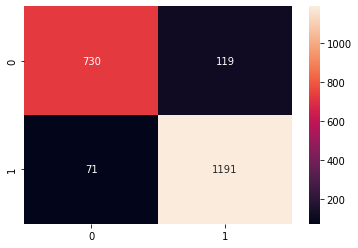

In [62]:
sns.heatmap(cf_matrix, annot=True, fmt='.0f')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


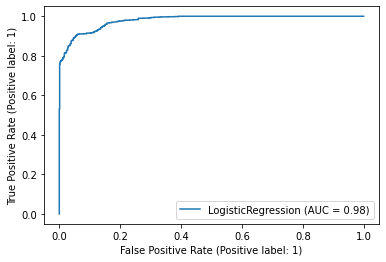

In [63]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve
plot_roc_curve(logreg, X, y) 

In [64]:
print('Recall:', metrics.recall_score(trabajo['NObeyesdad'], trabajo['Obesidad_clase_pred']))

Recall: 0.9437400950871633


In [65]:
print('Fbeta score:', metrics.fbeta_score(trabajo['NObeyesdad'], trabajo['Obesidad_clase_pred'], beta=2))

Fbeta score: 0.9366152878263605


In [66]:
print('Precisión:', metrics.precision_score(trabajo['NObeyesdad'], trabajo['Obesidad_clase_pred']))

Precisión: 0.9091603053435114


In [67]:
from sklearn import metrics
print('Exactitud:', metrics.accuracy_score(trabajo['NObeyesdad'], trabajo['Obesidad_clase_pred']))

Exactitud: 0.9099952629085741


In [68]:
h=0.2
a=LogisticRegression(C=h, penalty='l2',solver='liblinear',multi_class='auto', tol = 1e-5) # lasso logistica, penalty es l1 lasso l2 ridge

# Proceso iterativo para hyperparametros

In [ ]:
t=[1e-3,1e-4,1e-5,1e-6]
modelo = []
for i in range(0,50,1):
  b=np.linspace(0.001, 5, 50)
  for j in range(0,4,1):
   regresion = LogisticRegression(C=b[i], penalty='l2',solver='liblinear',multi_class='auto', tol = t[j], random_state=1) # lasso logistica, penalty es l1 lasso
   a = regresion.fit(X,y)
   modelo.append(a)

In [ ]:
y_pred = []
Exactitud = []
Recall = []
for i in range(0,50*4,1):
  y_pred.append(modelo[i].predict(X))
for j in range(0,50*4,1):
  Exactitud.append(metrics.accuracy_score(trabajo['NObeyesdad'], y_pred[j]))
  Recall.append(metrics.recall_score(trabajo['NObeyesdad'], y_pred[j]))
Exactitud == max(Exactitud)

Recall == max(Recall) # el recall maximo es con 0.001

array([ True,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

Por la exactitud, a distintas tolerancias, el mejor modelo Ridge es a un alpha de 0.3070612244897959, y con el Recall, el mejor modelo Ridge es con un alpha de 0.001

In [ ]:
logModel = LogisticRegression()

In [ ]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet','none'],
    'C' : np.linspace(0.001, 5, 50),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [ ]:
clf = GridSearchCV(logModel, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

In [ ]:
best_clf = clf.fit(X,y)

Fitting 5 folds for each of 4000 candidates, totalling 20000 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
9000 fits failed out of a total of 20000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1000 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError:

In [ ]:
best_clf.best_params_ # Mejor modelo l2 y liblinear el solver

{'C': 3.2656530612244894,
 'max_iter': 100,
 'penalty': 'l2',
 'solver': 'liblinear'}

# Particion de la base

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X , y,test_size = 0.2, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape) 

(1688, 6) (423, 6) (1688,) (423,)


In [ ]:
# try alpha=0.001 and examine coefficients
from sklearn.linear_model import Lasso
lassoreg = Lasso(alpha=0.001)
lassoreg.fit(X_train, y_train)
print(lassoreg.coef_)

[ 0.08380653  0.32910834  0.19092834 -0.07630376 -0.08480222 -0.03907589]


In [ ]:
# Crear el metodo K fold CV
from sklearn.model_selection import KFold
cv = KFold(n_splits=5, random_state=666, shuffle=True) # shuffle que no sea el mismo orden cuando llegan los datos

In [ ]:
from sklearn.model_selection import cross_val_score
cl=LogisticRegression(C=0.1, penalty='l2',solver='liblinear',multi_class='auto', random_state=1)
scores1 = cross_val_score(cl, X_train, y_train, scoring='recall', cv=cv, n_jobs=-1) 
scores1

array([0.92610837, 0.95767196, 0.94202899, 0.94527363, 0.9223301 ])

In [ ]:
# Estimar el modelo en cada uno de los k folds
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
scores = cross_validate(cl, X_train, y_train, scoring='recall', cv=cv, n_jobs=-1, return_estimator=True) 
for model in scores['estimator']:
    print(model.intercept_,model.coef_)

[0.57130178] [[ 0.43789648  3.04925867  1.23731398 -0.06078625 -0.43905    -0.49536402]]
[0.64736383] [[ 0.41290326  3.10179645  1.22330863 -0.13684897 -0.43899565 -0.49196202]]
[0.57133693] [[ 0.40613759  3.12352364  1.15961895  0.03914168 -0.2797193  -0.48999405]]
[0.57132457] [[ 0.39942521  3.0566854   1.33265104 -0.10307653 -0.53474279 -0.53360428]]
[0.54268159] [[ 0.39424721  3.05898137  1.19164215 -0.00886805 -0.3680546  -0.46802521]]


In [ ]:
print('Recall promedio:', abs(np.mean(scores['test_score']))) #0.9386826092983231

Recall promedio: 0.9386826092983231


In [ ]:
intercepto=[];beta_1=[];beta_2=[];beta_3=[];beta_4=[];beta_5=[];beta_6=[]
for j in range(0,5,1):
  intercepto.append (scores['estimator'][j].intercept_[0])
  beta_1.append (scores['estimator'][j].coef_[0][0])
  beta_2.append (scores['estimator'][j].coef_[0][1])
  beta_3.append (scores['estimator'][j].coef_[0][2])
  beta_4.append (scores['estimator'][j].coef_[0][3])
  beta_5.append (scores['estimator'][j].coef_[0][4])
  beta_6.append (scores['estimator'][j].coef_[0][5])
print(np.mean(intercepto),np.mean(beta_1),np.mean(beta_2),np.mean(beta_3),np.mean(beta_4),np.mean(beta_5),np.mean(beta_6))

0.5808017390758685 0.41012194980450795 3.0780491075623146 1.2289069491521452 -0.05408762253100395 -0.41211246932483325 -0.49578991435737285


In [ ]:
print("log(odds) = " ,float(np.mean(intercepto)) ,"+ ",np.mean(beta_1),"X_1","+ ",np.mean(beta_2),"X_2","+ ",np.mean(beta_3),"X_3",np.mean(beta_4),"X_4","+ ",np.mean(beta_5),"X_5","+ ",np.mean(beta_6),"X_6" )

log(odds) =  0.5808017390758685 +  0.41012194980450795 X_1 +  3.0780491075623146 X_2 +  1.2289069491521452 X_3 -0.05408762253100395 X_4 +  -0.41211246932483325 X_5 +  -0.49578991435737285 X_6


In [ ]:
y_pred=[]
for i in range(0,423,1):
  ods = np.exp(np.mean(intercepto)+np.mean(beta_1)*X_test[i][0]+np.mean(beta_2)*X_test[i][1]+np.mean(beta_3)*X_test[i][2]+np.mean(beta_4)*X_test[i][3]+np.mean(beta_5)*X_test[i][4]+np.mean(beta_6)*X_test[i][5])
  proba = ods/(1+ods)
  if proba<=0.5:
    y_pred.append(0)
  else:
    y_pred.append(1)

In [ ]:
print('Recall:', metrics.recall_score(y_test, y_pred))

Recall: 0.953125


In [ ]:
print('Exactitud:', metrics.accuracy_score(y_test, y_pred))

Exactitud: 0.9054373522458629


In [ ]:
print('Fbeta score:', metrics.fbeta_score(y_test, y_pred, beta=2))

Fbeta score: 0.9413580246913582


In [ ]:
print('Precisión:', metrics.precision_score(y_test, y_pred))

Precisión: 0.8970588235294118


In [ ]:
cf_matrix1 = confusion_matrix(y_test, y_pred) # Esta clasificando 174 mal 
cf_matrix1

array([[139,  28],
       [ 12, 244]])

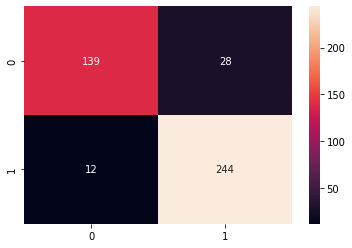

In [ ]:
sns.heatmap(cf_matrix1, annot=True, fmt='.0f')

In [ ]:
logModel = LogisticRegression()

In [ ]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet','none'],
    'C' : np.logspace(0.01, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
clf = GridSearchCV(logModel, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1, scoring="accuracy")

In [ ]:
best_clf = clf.fit(X_train,y_train)

Fitting 5 folds for each of 1600 candidates, totalling 8000 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
3600 fits failed out of a total of 8000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: S

In [ ]:
best_clf.best_params_ # Mejor modelo un L2 y solver liblinear para estos datos

{'C': 1.023292992280754,
 'max_iter': 100,
 'penalty': 'l2',
 'solver': 'liblinear'}

In [ ]:
best_clf.best_score_ #0.9152845328604288

0.9152845328604288

In [ ]:
best_clf.best_estimator_

LogisticRegression(C=1.023292992280754, solver='liblinear')

A partir de GrindSearch, el mejor modelo es un Ridge, con una penalizacion de 1.02 y un solver liblinear

# Justificacion

Seleccionamos este algoritmo ya que en esta entrega buscamos ver las relaciones entre las variables explicativas, y el rango de clasificacion del IMC, ademas de ser el modelo recomendado de GrindSearch

Empleamos Exactitud, presicion, recall y F2 Score

Escogeriamos el segundo modelo, ya que al no usar toda la base, los resultados son mas "cofiables"

Empleando la regresion logistica, solo se puede para variables binarias, y seria de interes poder clasificar en los rangos del IMC

Se puede mejorar empleando el C recomendado por GrindSearch y no el establecido para realizar pruebas

